In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



Visualisasi Distribusi Fitur:


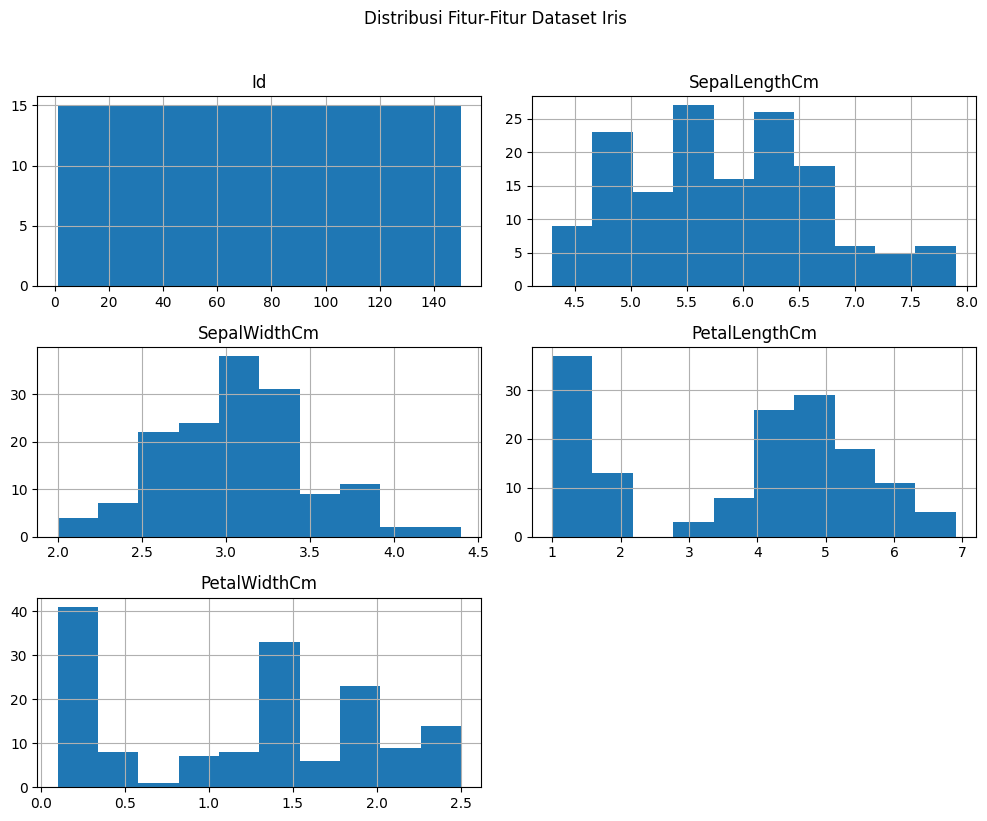

In [22]:
print("\nVisualisasi Distribusi Fitur:")
data.hist(figsize=(10, 8))
plt.suptitle('Distribusi Fitur-Fitur Dataset Iris', y=1.02)
plt.tight_layout()
plt.show()


Visualisasi Hubungan Antar Fitur dan Perbedaan Kelas:


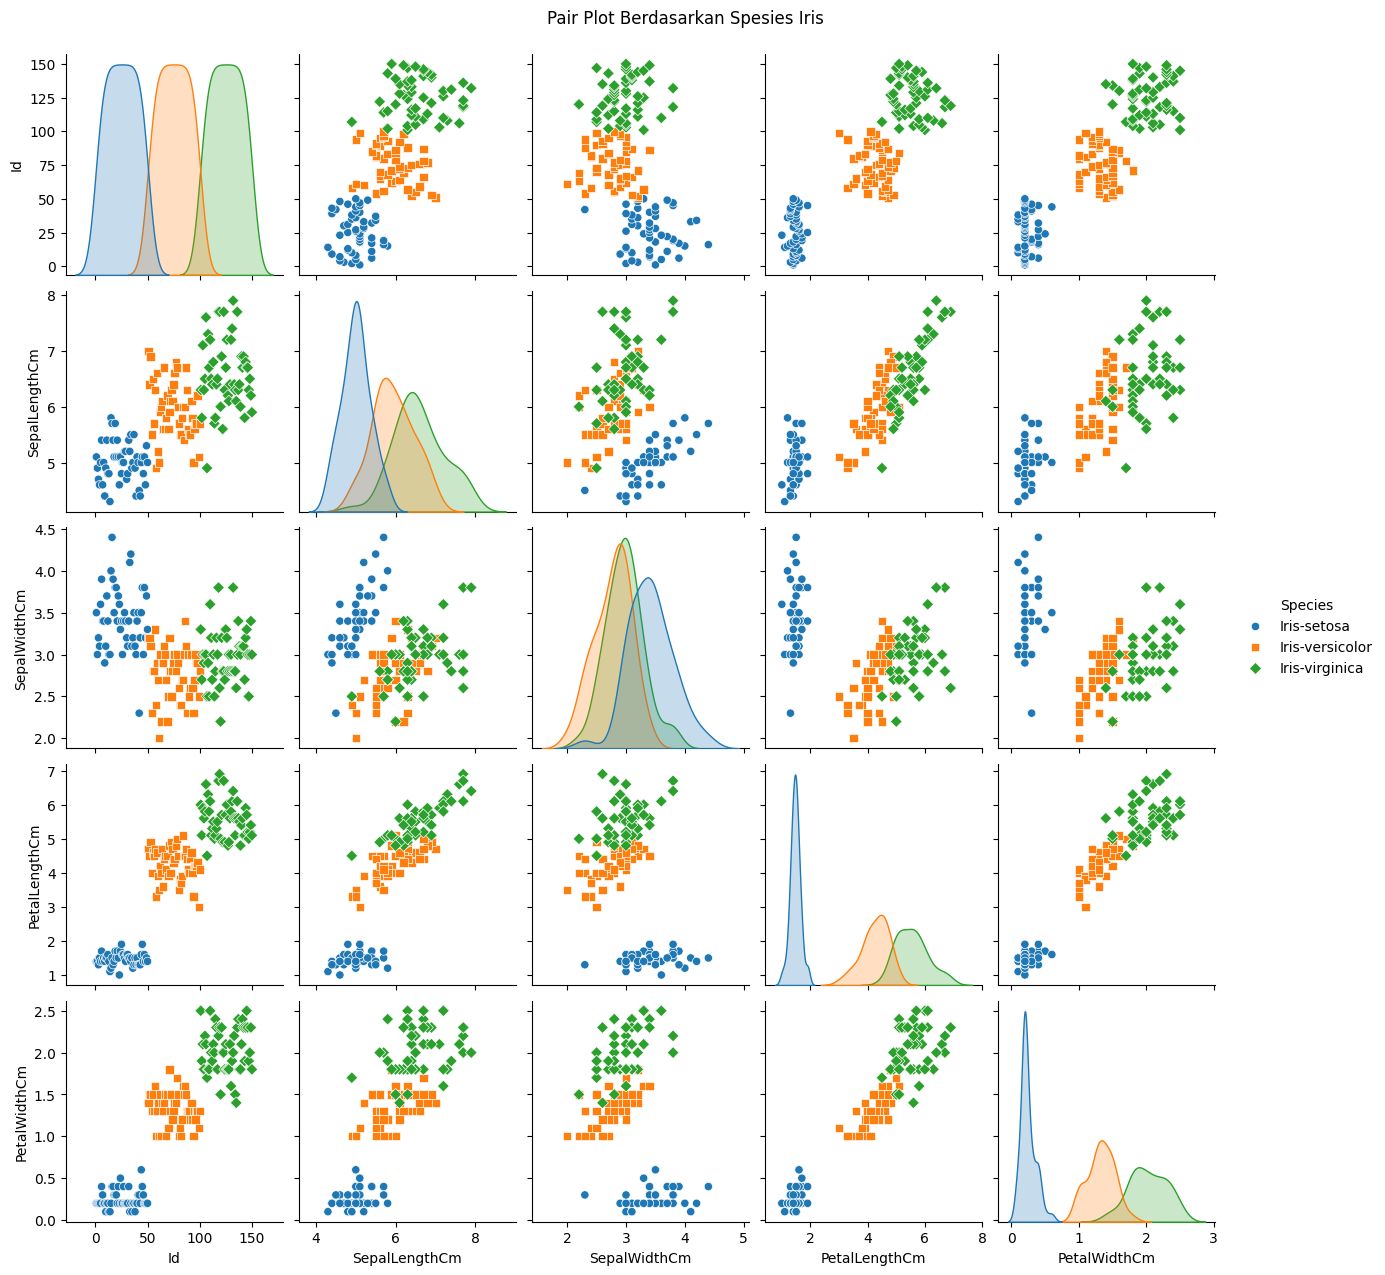

In [23]:

print("\nVisualisasi Hubungan Antar Fitur dan Perbedaan Kelas:")
sns.pairplot(data, hue='Species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot Berdasarkan Spesies Iris', y=1.02)
plt.show()

In [27]:
data.drop('Id', axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
X = data.drop('Species', axis=1)
y = data['Species']

In [42]:
data = data.drop('Id', axis=1)

X = data.drop('Species', axis=1)
y = data['Species']

print("\nBentuk Fitur (X):", X.shape)
print("Bentuk Target (y):", y.shape)


Bentuk Fitur (X): (150, 4)
Bentuk Target (y): (150,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
print("\nJumlah Data Training:", X_train.shape[0])
print("Jumlah Data Testing:", X_test.shape[0])


Jumlah Data Training: 120
Jumlah Data Testing: 30


In [45]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred = model.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

1.0

In [49]:
df_test = pd.DataFrame(X_test)
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred

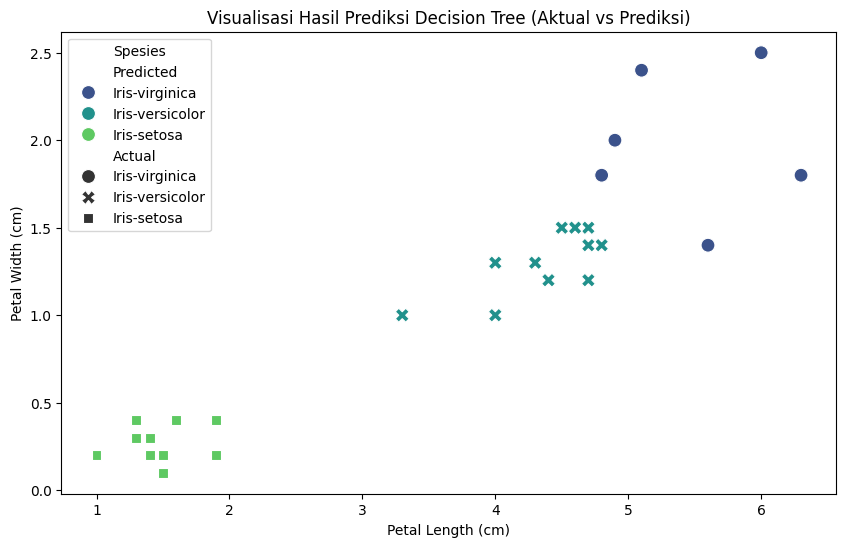

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Predicted', style='Actual', data=df_test, palette='viridis', s=100)
plt.title('Visualisasi Hasil Prediksi Decision Tree (Aktual vs Prediksi)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Spesies')
plt.show()

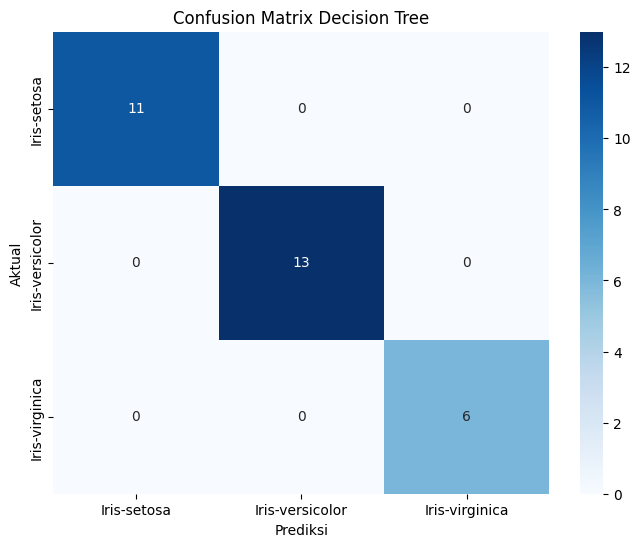

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix Decision Tree')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

In [53]:
# Metrik Akurasi
print(f"\nAkurasi Model: {accuracy_score(y_test, y_pred):.2f}")

# Laporan Klasifikasi (Classification Report)
# ringkasan metrik evaluasi (Precision, Recall, F1-Score)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi Model: 1.00

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [55]:
data_baru = {
    'SepalLengthCm': [5.1],
    'SepalWidthCm': [3.5],
    'PetalLengthCm': [1.4],
    'PetalWidthCm': [0.2]
}

#Konversi dictionary menjadi DataFrame
data_baru_df = pd.DataFrame(data_baru)

print("Data Baru:")
print(data_baru_df)

Data Baru:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2


In [56]:
prediksi_baru = model.predict(data_baru_df)

print("\nPrediksi Spesies untuk Data Baru:")
print(prediksi_baru)


Prediksi Spesies untuk Data Baru:
['Iris-setosa']


In [57]:
jumlah_sampel = 10
jumlah_fitur = 4 # SepalLength, SepalWidth, PetalLength, PetalWidth

data_baru_acak = np.random.rand(jumlah_sampel, jumlah_fitur) * 10
# Kita kalikan 10 agar nilainya lebih realistis untuk dataset Iris

# Ubah ke DataFrame untuk memudahkan
kolom = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data_baru_df = pd.DataFrame(data_baru_acak, columns=kolom)

# Tampilkan 5 baris pertama data baru
print("Data Baru (10 sampel acak):")
print(data_baru_df.head())

# Lakukan prediksi
prediksi_baru = model.predict(data_baru_df)

print("\nPrediksi Spesies untuk 10 Sampel Acak:")
print(prediksi_baru)

Data Baru (10 sampel acak):
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       8.283560      6.634290       0.210893      7.765189
1       8.767448      0.266896       5.532705      4.075190
2       0.771175      1.110598       5.019992      6.685592
3       4.966653      1.737098       4.955386      9.491236
4       5.427778      9.765438       0.050685      0.896707

Prediksi Spesies untuk 10 Sampel Acak:
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']


In [59]:
prediction = model.predict(X_test)
prediction

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)